
**SMSSpamCollection

[tab-separated-values] (tsv) file with four columns:
> **label** - every message is labeled as either ***ham*** or ***spam***<br>
> **message** - the message itself<br>
> **length** - the number of characters in each message<br>
> **punct** - the number of punctuation characters in each message

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('smsspamcollection.tsv', sep='\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [3]:
len(df)

5572

## missing values:

In [4]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [6]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
df['length'].describe()

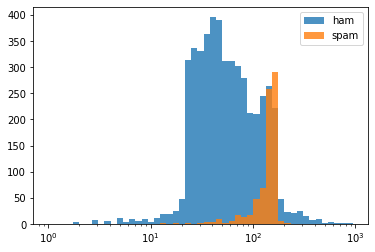

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [ ]:
df['punct'].describe()

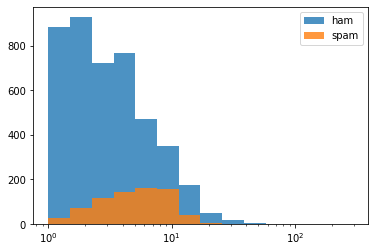

In [8]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

## Selecting features
If the number of features is small, then  we can pass those in directly:
> `X = df[['length','punct']]`

If the number of features is large, then it may be easier to drop the Label and any other unwanted columns:
> `X = df.drop(['label','message'], axis=1)`

In [9]:
# Create Feature and Label sets
X = df[['length','punct']]  # note the double set of brackets
y = df['label']

In [10]:
X

,length,punct
0,111,9
1,29,6
2,155,6
3,49,6
4,61,2
...,...,...
5567,160,8
5568,36,1
5569,57,7
5570,125,1


In [11]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (3733, 2)
Testing Data Shape:  (1839, 2)


## LogisticRegression

In [14]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs')

lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
from sklearn import metrics

# Create a prediction set:
predictions = lr_model.predict(X_test)

# Print a confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[1547   46]
 [ 241    5]]


In [16]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1547,46
spam,241,5


In [17]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.92      1593
        spam       0.10      0.02      0.03       246

    accuracy                           0.84      1839
   macro avg       0.48      0.50      0.47      1839
weighted avg       0.76      0.84      0.80      1839



In [18]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.843936922240348


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

In [ ]:
predictions = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

In [ ]:
print(metrics.classification_report(y_test,predictions))

In [ ]:
print(metrics.accuracy_score(y_test,predictions))

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(gamma='auto')
svc_model.fit(X_train,y_train)

In [ ]:
predictions = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

In [ ]:
print(metrics.classification_report(y_test,predictions))

In [ ]:
print(metrics.accuracy_score(y_test,predictions))